In [150]:
import numpy as np

In [151]:
import pandas as pd

In [152]:
dataset = pd.read_csv("tic-tac-toe.data", sep=',', names = [(x // 3, x%3) for x in  range(9)] + ['target'])

In [153]:
import copy

In [154]:
def dummy_encode_categorical_columns(data):
    result_data = copy.deepcopy(data)
    for column in data.columns.values:
        result_data = pd.concat([result_data, pd.get_dummies(result_data[column], prefix = column, prefix_sep = ':')], axis = 1)
        del result_data[column]
    return result_data

In [155]:
encoded_dataset = dummy_encode_categorical_columns(dataset)

In [156]:
encoded_dataset

,"(0, 0):b","(0, 0):o","(0, 0):x","(0, 1):b","(0, 1):o","(0, 1):x","(0, 2):b","(0, 2):o","(0, 2):x","(1, 0):b",...,"(2, 0):o","(2, 0):x","(2, 1):b","(2, 1):o","(2, 1):x","(2, 2):b","(2, 2):o","(2, 2):x",target:negative,target:positive
0,0,0,1,0,0,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1
1,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1
2,0,0,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,1
3,0,0,1,0,0,1,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
4,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
5,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
6,0,0,1,0,0,1,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
7,0,0,1,0,0,1,0,0,1,0,...,1,0,1,0,0,0,1,0,0,1
8,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
9,0,0,1,0,0,1,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [157]:
xs = encoded_dataset.values[:,:-2]

In [158]:
y = encoded_dataset.values[:,-1]

In [159]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
classifier = RandomForestClassifier(n_estimators=100, n_jobs=4)

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
X_train, X_test, y_train, y_test = train_test_split(xs, y, test_size=0.1)

In [163]:
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=4, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [165]:
predictions = classifier.predict(X_test)
(accuracy_score(y_test, predictions),
precision_score(y_test, predictions),
recall_score(y_test, predictions),
f1_score(y_test, predictions))

(0.9791666666666666, 0.9672131147540983, 1.0, 0.9833333333333333)

Результаты модели случайного леса на басовых фичах

# Простая модель

Посмотрим поддержку у отрицательного и положительного класса и поставим границу на их отношение, как границу класса один

In [129]:
def closure(Xs, x, mask, element_from_same_set=False):
    return (np.all(Xs[:, mask] == x[mask], 1).sum()- int(element_from_same_set)) * np.sum(mask) / len(mask) / Xs.shape[0] 

In [90]:
from sklearn.metrics import *

In [134]:
def validate_quality(X_train, X_test, Y_train, Y_test, coeff):
    X_pos = X_train[Y_train==1]
    X_neg = X_train[Y_train==0]
    
    X_pos_closure = np.array([np.mean([closure(X_pos, x, x_tr == x) for x_tr in X_pos]) for x in X_test])
    X_neg_closure = np.array([np.mean([closure(X_neg, x, x_tr == x) for x_tr in X_neg]) for x in X_test])
    predictions = (X_pos_closure * coeff - X_neg_closure ) > 0
    return (accuracy_score(Y_test, predictions),
    precision_score(Y_test, predictions),
    recall_score(Y_test, predictions),
    f1_score(Y_test, predictions))

In [96]:
validate_quality(X_train, X_test, y_train, y_test, 1.473)

(0.8229166666666666,
 0.8148148148148148,
 0.9705882352941176,
 0.8859060402684563)

In [135]:
import matplotlib.pyplot as plt

In [136]:
%matplotlib inline


  0%|          | 0/50 [00:00<?, ?it/s]/Users/alexander/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/alexander/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)

100%|██████████| 50/50 [01:52<00:00,  2.44s/it]


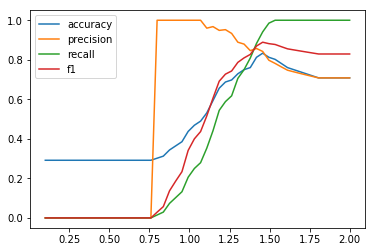

In [141]:
borders = np.linspace(0.1, 2, 50)
results_a = []
results_p = []
results_r = []
results_f = []
for border in tqdm(borders):
    acc, p_s, r_s, f1 = validate_quality(X_train, X_test, y_train, y_test, border)
    results_a.append(acc)
    results_p.append(p_s)
    results_r.append(r_s)
    results_f.append(f1)
    
plt.plot(borders[:len(results_a)], results_a, label='accuracy')
plt.plot(borders[:len(results_a)], results_p, label='precision')
plt.plot(borders[:len(results_a)], results_r, label='recall')
plt.plot(borders[:len(results_a)], results_f, label='f1')
plt.legend()
plt.show()

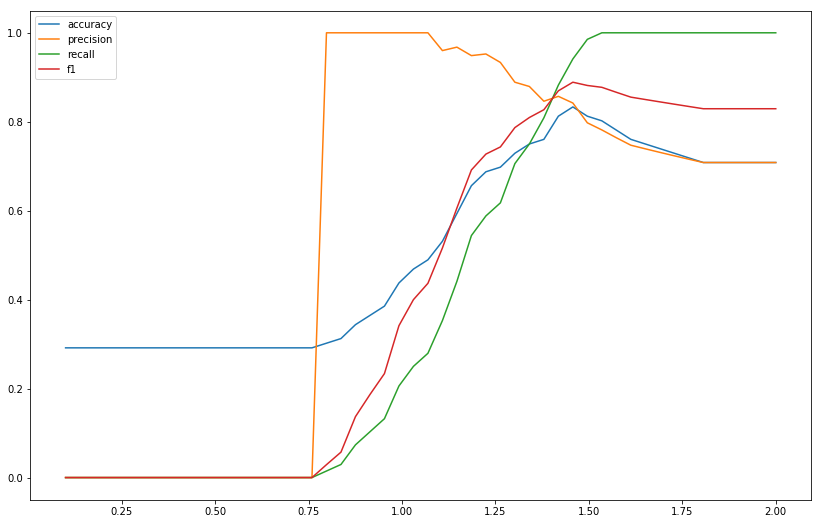

In [144]:
plt.figure(figsize=(14,9))
plt.plot(borders[:len(results_a)], results_a, label='accuracy')
plt.plot(borders[:len(results_a)], results_p, label='precision')
plt.plot(borders[:len(results_a)], results_r, label='recall')
plt.plot(borders[:len(results_a)], results_f, label='f1')
plt.legend()
plt.show()

Зависимость результатов от модели

In [147]:
(results_a[np.argmax(results_f)],
results_p[np.argmax(results_f)],
results_r[np.argmax(results_f)],
results_f[np.argmax(results_f)])

(0.8333333333333334,
 0.8421052631578947,
 0.9411764705882353,
 0.8888888888888888)

# Модель посложнее

Посмотрим поддержку и достоверность у отрицательного и положительного класса, так как признака уже 4 обучим поверх этого random forest

In [100]:
from tqdm import tqdm

In [148]:
def validate_quality(X_train, X_test, Y_train, Y_test):
    X_pos = X_train[Y_train==1]
    X_neg = X_train[Y_train==0]
    
    X_pos_closure = np.array([np.mean([closure(X_pos, x, x_tr == x, True) for x_tr in X_pos]) for x in tqdm(X_pos)] + [np.mean([closure(X_pos, x, x_tr == x, False) for x_tr in X_pos]) for x in X_neg])
    X_neg_closure = np.array([np.mean([closure(X_neg, x, x_tr == x, False) for x_tr in X_neg]) for x in tqdm(X_pos)] + [np.mean([closure(X_neg, x, x_tr == x, True) for x_tr in X_neg]) for x in X_neg])
    X_pos_support = np.array([np.mean([closure(X_neg, x, x_tr == x, False) for x_tr in X_pos]) for x in tqdm(X_pos)] + [np.mean([closure(X_neg, x, x_tr == x, True) for x_tr in X_pos]) for x in X_neg])
    X_neg_support = np.array([np.mean([closure(X_pos, x, x_tr == x, True) for x_tr in X_neg]) for x in tqdm(X_pos)] + [np.mean([closure(X_pos, x, x_tr == x, False) for x_tr in X_neg]) for x in X_neg])
    features = np.dstack([X_pos_closure, X_neg_closure, X_pos_support, X_neg_support])[0]
    classifier = RandomForestClassifier(n_estimators=100, n_jobs=4)
    classifier.fit(features, [1] * X_pos.shape[0] + [0] * X_neg.shape[0],)
    X_pos_closure_test = np.array([np.mean([closure(X_pos, x, x_tr == x, False) for x_tr in X_pos]) for x in tqdm(X_test)])
    X_neg_closure_test = np.array([np.mean([closure(X_neg, x, x_tr == x, False) for x_tr in X_neg]) for x in tqdm(X_test)])
    X_pos_support_test = np.array([np.mean([closure(X_neg, x, x_tr == x, False) for x_tr in X_pos]) for x in tqdm(X_test)])
    X_neg_support_test = np.array([np.mean([closure(X_pos, x, x_tr == x, False) for x_tr in X_neg]) for x in tqdm(X_test)])
    features_test = np.dstack([X_pos_closure_test, X_neg_closure_test, X_pos_support_test, X_neg_support_test])[0]
    predictions = classifier.predict(features_test)
    return (accuracy_score(Y_test, predictions),
    precision_score(Y_test, predictions),
    recall_score(Y_test, predictions),
    f1_score(Y_test, predictions))

In [149]:
validate_quality(X_train, X_test, y_train, y_test)

100%|██████████| 96/96 [00:00<00:00, 125.38it/s]


(0.9270833333333334,
 0.9420289855072463,
 0.9558823529411765,
 0.9489051094890512)

Получилось сильно улучшить результаты простой модели и качество получилось чуть хуже, чем у базовой модели на стартовых фичах